# 030.KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [7]:
import numpy as np
from sklearn import neighbors, datasets

In [8]:
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [9]:
# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

print(X[:5])
print()
print(y[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### KNN object 생성 및 train

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [12]:
y_predict = clf.predict(X_test)
y_predict

array([2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1])

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[14,  0,  0],
       [ 0,  7,  7],
       [ 0,  1,  9]], dtype=int64)

## 시각화

- matplotlib.pyplot.pcolormesh(X, Y, C, cmap=)  
    - X: x coordinate  
    - Y: y coordinate  
    - C: color mapping 될 value

<img src="pcolormesh.png" width="400">

- matplotlib.colors.ListedColormap(colors-list)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1       # petal 의 최소, 최대값
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1       # sepal 의 최소, 최대값

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
XX = np.column_stack([X1.ravel(), X2.ravel()])
y_pred = clf.predict(XX)
y_pred = y_pred.reshape(X1.shape)

In [38]:
print(X1.shape)
print(X2.shape)
print(y_pred.shape)
print(np.unique(y_pred))

(220, 280)
(220, 280)
(220, 280)
[0 1 2]


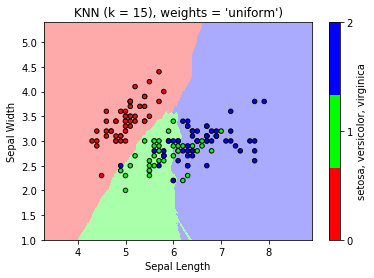

In [39]:
# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)

plt.figure()
plt.pcolormesh(X1, X2, y_pred, cmap=cmap_light)    # 결정경계 표시

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)    # true value (label) data 표시

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("KNN (k = 15), weights = 'uniform')")
plt.colorbar(ticks=range(3), format='%d', label='setosa, versicolor, virginica');

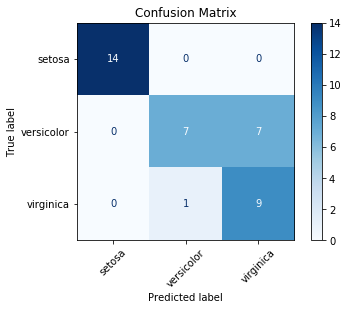

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test, y_test, 
                                          display_labels=iris.target_names,
                                          cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xticklabels(iris.target_names, rotation=45)
plt.show()

### 예측의 정확도 평가

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_predict)

0.7894736842105263

# 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

# your code here

y_predict = clf.predict(X_test)
print("accuracy = {}".format(accuracy_score(y_test, y_predict)))